In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

import os
os.environ["TERRA_CONFIG_PATH"] = "/home/sabri/code/spr-21/terra_config.json"
import terra
import numpy as np

from spr.feedback import merge_in_feedback

In [16]:
few_shot = __import__("05-12_score_few_shot")

mask_pos_v
0.2
[2021-05-13 18:01:45,931][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: plot_score_few_shot, run_id=391


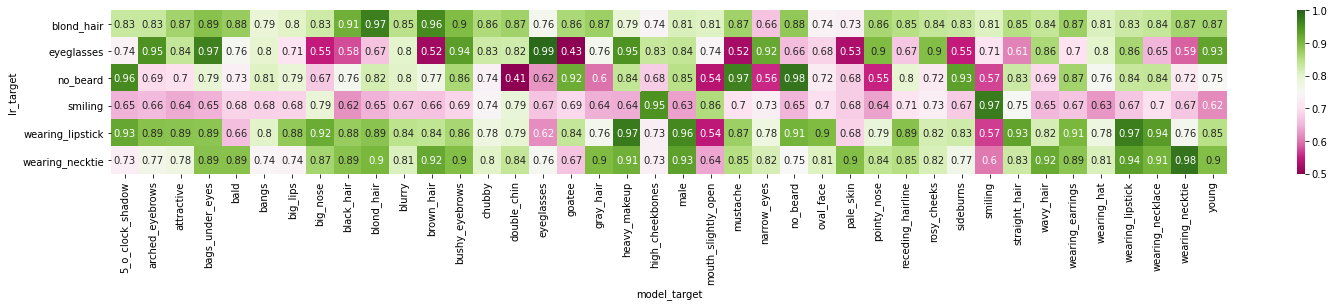

In [15]:
run_id = 369
print(terra.inp(run_id)["strat"])
print(terra.inp(run_id).get("threshold", None))
few_shot.plot_score_few_shot(terra.out(run_id))

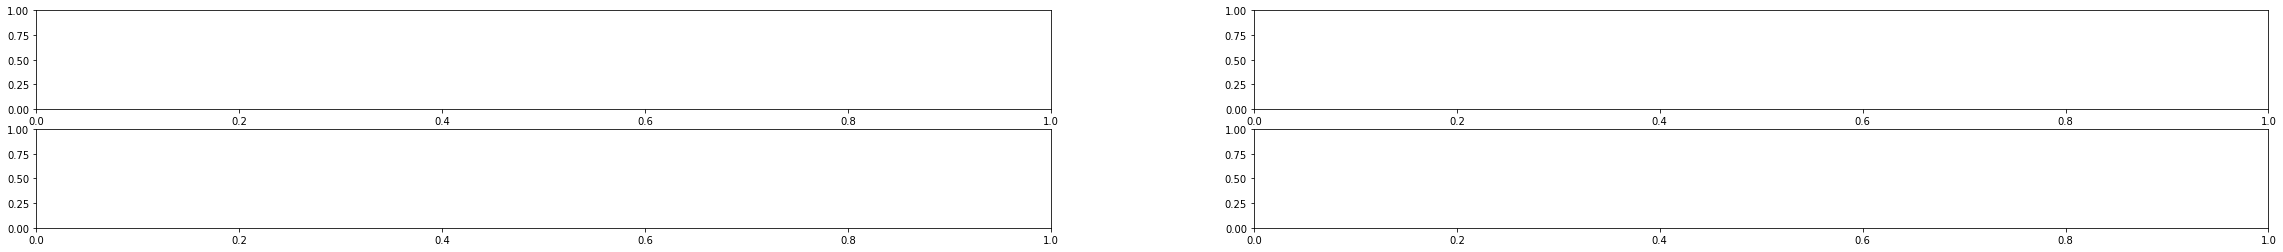

In [27]:
diff_df = few_shot.plot_score_diff(terra.out(354).load(), terra.out(369).load())

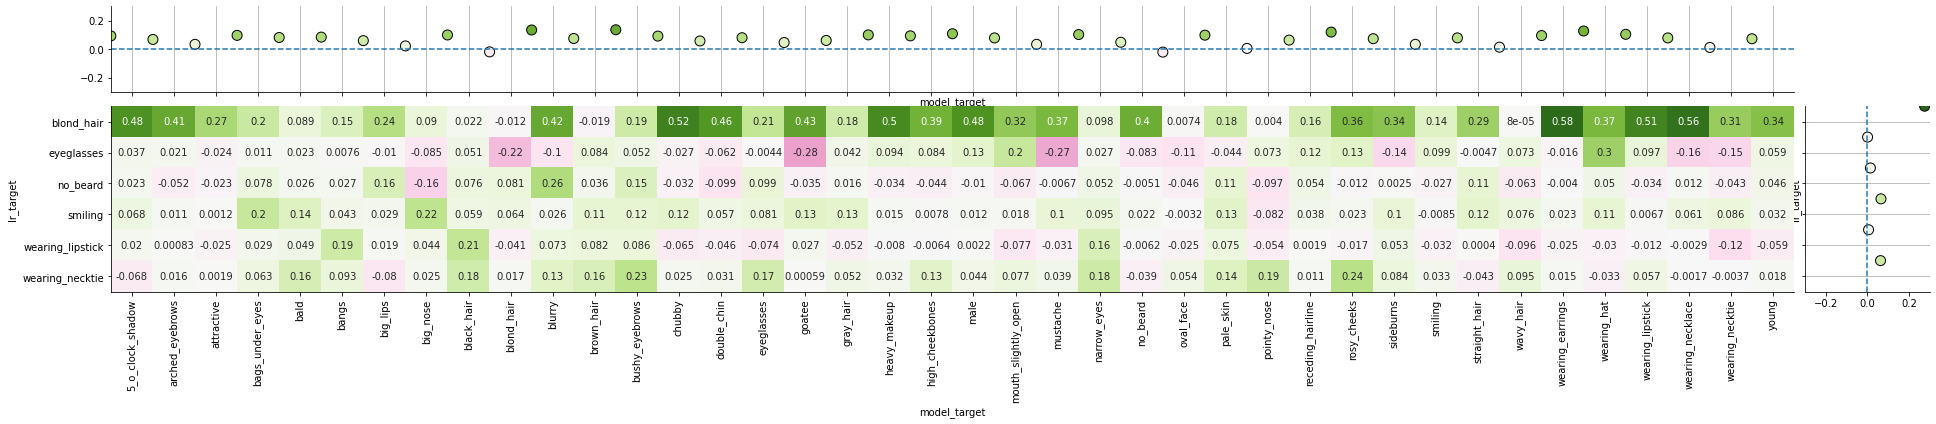

In [147]:
import matplotlib.pyplot as plt
import matplotlib as mpl
width, height = (25, 4) 
marg_size = 2
f = plt.figure(figsize=(width+ marg_size, height+ marg_size))
gs = plt.GridSpec(height + marg_size, width + marg_size)

ax_marg_x = f.add_subplot(gs[:marg_size, :-marg_size])
ax_marg_y = f.add_subplot(gs[marg_size:, -marg_size:])
ax_joint = f.add_subplot(gs[marg_size:, :-marg_size], sharex=ax_marg_x, sharey=ax_marg_y )

marg_y = diff_df.mean(axis=1)
sns.scatterplot(
    x=marg_y, 
    y=marg_y.index, 
    hue=marg_y,
    palette="PiYG", 
    hue_norm=(-0.2, 0.2), 
    linewidth=1, 
    legend=False, 
    edgecolor='k', 
    s=100,
    ax=ax_marg_y
)
# ax_marg_y.scatter(
#     x=marg_y, 
#     y=marg_y.index, 
#     c=marg_y,
#     cmap="PiYG", 
#     #norm=mpl.colors.Normalize(vmin=-0.2, vmax=0.2), 
#     linewidth=1, 
#     edgecolor='k', 
#     s=100,
# )
ax_marg_y.axvline(0, ls='--')
ax_marg_y.yaxis.grid(True)
ax_marg_y.set_xlim(-0.3, 0.3) 
ax_marg_y.set_ylabel('Mean AUROC')
ax_marg_y.set_xlabel('')

marg_x = diff_df.mean(axis=0)
sns.scatterplot(
    y=marg_x, 
    x=marg_x.index, 
    hue=marg_x,
    palette="PiYG", 
    hue_norm=(-0.2, 0.2), 
    linewidth=1, 
    edgecolor='k', 
    s=100,
    legend=False,
    ax=ax_marg_x
)
ax_marg_x.xaxis.grid(True)
ax_marg_x.axhline(0, ls='--')
ax_marg_x.set_ylim(-0.3, 0.3)
ax_marg_x.set_ylabel('Mean AUROC')
ax_marg_x.set_xlabel('')


# important that this is plotted last 
sns.heatmap(data=diff_df, cmap="PiYG", annot=True, vmin=-0.6, vmax=0.6, ax=ax_joint, cbar=False)

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)
plt.setp(ax_marg_x.get_xticklabels(minor=True), visible=True)
plt.setp(ax_marg_y.get_yticklabels(minor=True), visible=False)
plt.setp(ax_marg_x.yaxis.get_minorticklines(), visible=False)
plt.setp(ax_marg_y.xaxis.get_minorticklines(), visible=True)

sns.despine(f)

f.tight_layout()
f.subplots_adjust(hspace=.4, wspace=.2)

examples
None
[2021-05-13 17:57:34,300][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: plot_score_few_shot, run_id=388


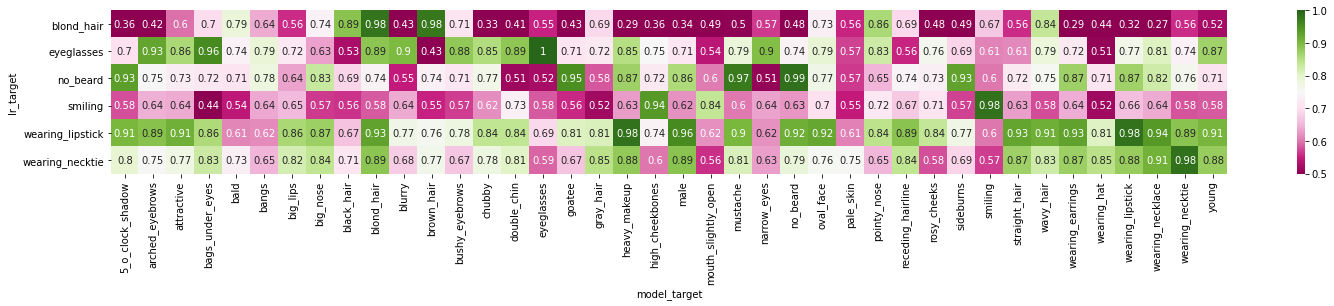

In [9]:
run_id = 354
print(terra.inp(run_id)["strat"])
print(terra.inp(run_id).get("threshold", None))
few_shot.plot_score_few_shot(terra.out(run_id))

mask_pos_v_neg
0.2
[2021-05-13 17:57:00,937][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: plot_score_few_shot, run_id=387


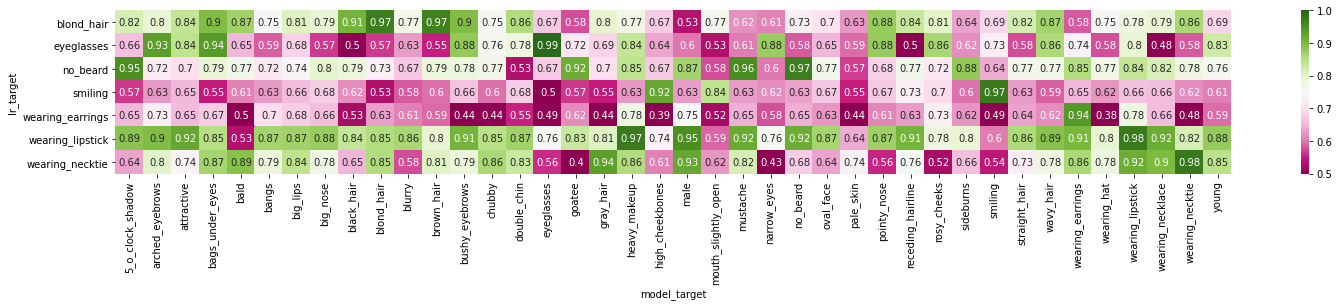

In [8]:
run_id = 380
print(terra.inp(run_id)["strat"])
print(terra.inp(run_id).get("threshold", None))
few_shot.plot_score_few_shot(terra.out(run_id))

mask_pos_v_neg
[2021-05-13 17:55:43,901][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: plot_score_few_shot, run_id=385


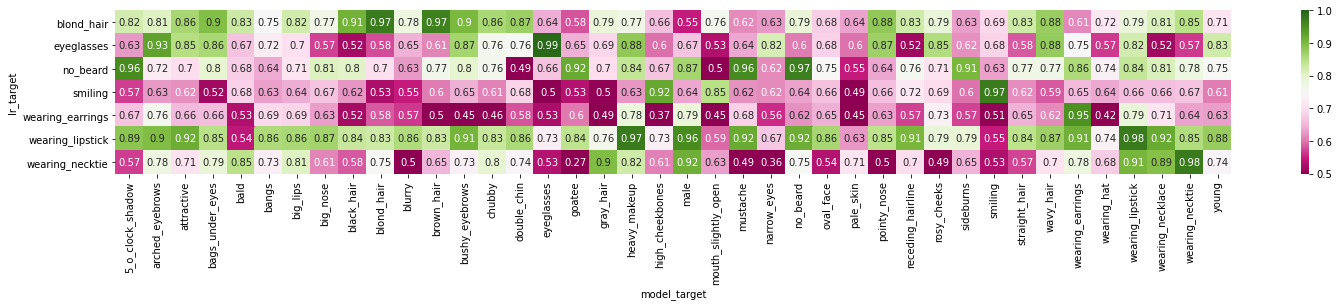

In [6]:
run_id = 382
print(terra.inp(run_id)["strat"])
few_shot.plot_score_few_shot(terra.out(run_id))

In [2]:
#prepare data
model_target = "double_chin"
feedback_run_id = 282
lr_target = terra.inp(feedback_run_id)["label"]

dp = terra.get_artifacts(
    run_id=327, 
    group_name=f"{model_target}_activations"
)["dp"].load()

feedback_dp = terra.out(run_id=feedback_run_id)[0].load()
dp = merge_in_feedback(dp, feedback_dp, remove=True)

columns = ["activation", lr_target, "feedback_label"]
train_dp = dp[columns + ["feedback_neg_mask", "feedback_pos_mask"]][np.where(dp["feedback_label"].data != "unlabeled")[0]]
test_dp = dp[columns][np.where(dp["feedback_label"].data == "unlabeled")[0]]

In [4]:
from spr.feedback import ScribbleModel

model = ScribbleModel(strategy="example")
model.fit(train_dp)

In [5]:
lr_preds = model.predict(test_dp)
test_dp.add_column("lr_preds", lr_preds, overwrite=True)

AxisError: axis 1 is out of bounds for array of dimension 1

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_dp[lr_target], test_dp["lr_preds"])

0.6648024582758219